# ***Stack Overflow Annual Developer Survey 2024***




# ***Business understanding***

The tech industry is evolving rapidly, and understanding the factors that influence developer success is crucial for companies, educators, and developers themselves. This project explores insights from the Stack Overflow Developer Survey 2024 to answer key questions about salaries, education, job search behavior, and popular technologies. By analyzing these patterns, we aim to identify what makes developers thrive in today’s competitive market.



# ***Download the Datasets***

In [107]:
import kagglehub  # Import kagglehub to download datasets directly from Kaggle

# Download the latest version of the Stack Overflow Developer Survey 2024 dataset
path = kagglehub.dataset_download("berkayalan/stack-overflow-annual-developer-survey-2024")

# Display the local file path where the dataset has been saved
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/stack-overflow-annual-developer-survey-2024


# ***Import library***

In [129]:
# Importing core libraries for data manipulation and visualization
import pandas as pd  # DataFrames and data analysis
import numpy as np  # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visual styling

# Import the Counter class from the collections module to count occurrences
from collections import Counter

# Machine Learning model selection and evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import xgboost as xgb

from sklearn.model_selection import GridSearchCV

In [109]:
# Configure Pandas display options to improve readability during data exploration

# Display all rows in DataFrames (no row truncation)
pd.set_option('display.max_rows', None)
# Display all columns in DataFrames (no column truncation)
pd.set_option('display.max_columns', None)
# Prevent DataFrame output from breaking into multiple lines
pd.set_option('display.expand_frame_repr', False)

In [110]:
df = pd.read_csv(path + "/survey_results_public.csv") # Load the survey data into a DataFrame

# ***Data Understanding***

In [111]:
 df.shape

(65437, 114)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [113]:
df.index

RangeIndex(start=0, stop=65437, step=1)

In [114]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [115]:
df.sample()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
42959,42960,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,25,20,"Developer, full-stack",20 to 99 employees,I have some influence,NaN,Is set up to be customized and needs to be eng...,NaN,Poland,PLN\tPolish zloty,NaN,Dart;HTML/CSS;JavaScript;SQL;TypeScript,Dart;HTML/CSS;JavaScript;SQL,Dart;HTML/CSS;JavaScript;SQL,PostgreSQL;SQLite,PostgreSQL;SQLite,PostgreSQL;SQLite,Amazon Web Services (AWS);Digital Ocean;Google...,Digital Ocean,Digital Ocean,Next.js;Node.js;React;Remix;Svelte,Svelte,Svelte,NaN,NaN,NaN,Flutter,Flutter;Tauri,Flutter,Bun;Docker;Homebrew;npm;Vite,Bun;Homebrew;Vite,Bun;Homebrew;Vite,Visual Studio Code,Visual Studio Code,Visual Studio Code,MacOS,MacOS,Jira;Linear;YouTrack,Linear,Linear,Google Meet;Slack,Google Meet;Slack,Google Meet;Slack,NaN,NaN,NaN,Stack Overflow,A few times per week,No,NaN,Quickly finding code solutions,"No, not really","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN


Exploring key features to understand the dataset structure and spot any data quality issues.These columns are essential for demographic and salary analysis in later steps.


In [116]:
df['Age'].value_counts(dropna = False) #'Age': helps identify the dominant age groups among developers

,count
Age,
25-34 years old,23911
35-44 years old,14942
18-24 years old,14098
45-54 years old,6249
55-64 years old,2575
Under 18 years old,2568
65 years or older,772
Prefer not to say,322


Most of the participants are between 25-34 years old, while there are 322 who prefer not to say.

In [117]:
df['EdLevel'].value_counts(dropna=False) #'EdLevel': gives insights into the education background of respondents

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15557
Some college/university study without earning a degree,7651
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5793
NaN,4653
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970
"Associate degree (A.A., A.S., etc.)",1793
Primary/elementary school,1146
Something else,932


Most of those with a bachelor's degree have about 4653 outliers.

In [118]:
df['ConvertedCompYearly'].value_counts(dropna=False)#'ConvertedCompYearly': used to analyze salary trends and check for skewness or outliers

,count
ConvertedCompYearly,
NaN,42002
64444.0,321
53703.0,308
75184.0,230
85925.0,226
107406.0,208
150000.0,207
120000.0,203
200000.0,196


In [119]:
# Use the describe() method to generate summary statistics for the 'ConvertedCompYearly' column.
# This will give us an overview of the distribution of the yearly converted compensation values.
# Summary statistics include count, mean, standard deviation, minimum, percentiles (25%, 50%, 75%), and maximum.
df['ConvertedCompYearly'].describe()

,ConvertedCompYearly
count,2.343500e+04
mean,8.615529e+04
std,1.867570e+05
min,1.000000e+00
25%,3.271200e+04
50%,6.500000e+04
75%,1.079715e+05
max,1.625660e+07


# ***📈 Exploratory Data Analysis (EDA)***

In [84]:
def create_bar_plot(data, y_column, hue_column=None, order=None, title="", xlabel="", ylabel="", figsize=(12, 6), color_palette='viridis'):
    """
    Create a bar plot showing the distribution of data across categories with an optional hue for sub-categorization.

    Parameters:
    -----------
    data : pandas.DataFrame
        The data to visualize.
    y_column : str
        The column name for the y-axis (categorical variable).
    hue_column : str, optional
        The column to use for the hue (sub-categorization), default is None.
    order : list, optional
        The order of the categories on the y-axis, default is None.
    title : str, optional
        The title of the plot, default is an empty string.
    xlabel : str, optional
        The label for the x-axis, default is an empty string.
    ylabel : str, optional
        The label for the y-axis, default is an empty string.
    figsize : tuple, optional
        Figure size as (width, height), default is (12, 6).
    color_palette : str, optional
        The color palette to use for the plot, default is 'viridis'.

    Returns:
    --------
    None
        Displays the plot but does not return any value.
    """
    plt.figure(figsize=figsize)  # Set the figure size
    sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot
    plt.title(title)  # Set the plot title
    plt.xlabel(xlabel)  # Label the x-axis
    plt.ylabel(ylabel)  # Label the y-axis
    if hue_column:
        plt.legend(title=hue_column, bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend if hue is provided
    plt.tight_layout()  # Ensure the layout fits well in the plot area
    plt.show()  # Display the plot

Salary Distribution Plot

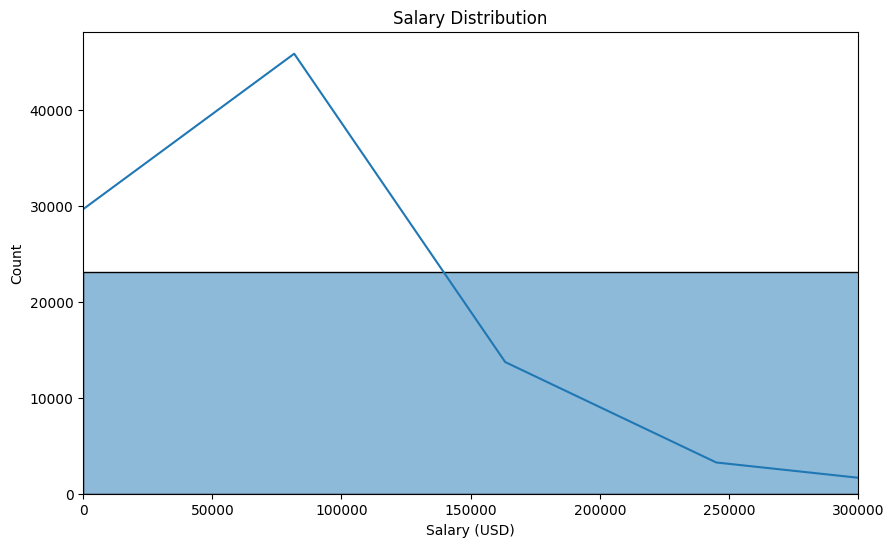

In [85]:
# Plot salary distribution with a KDE curve
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)  # Plot salary distribution with 50 bins and a KDE line
plt.title('Salary Distribution')  # Add title to the plot
plt.xlabel('Salary (USD)')  # Label x-axis as "Salary (USD)"
plt.ylabel('Count')  # Label y-axis as "Count"
plt.xlim(0, 300000)  # Set x-axis range from 0 to 300,000 for better visualization of salaries
plt.show()  # Display the plot

Top 5 Employment Types

<ipython-input-84-c143a2818707>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot


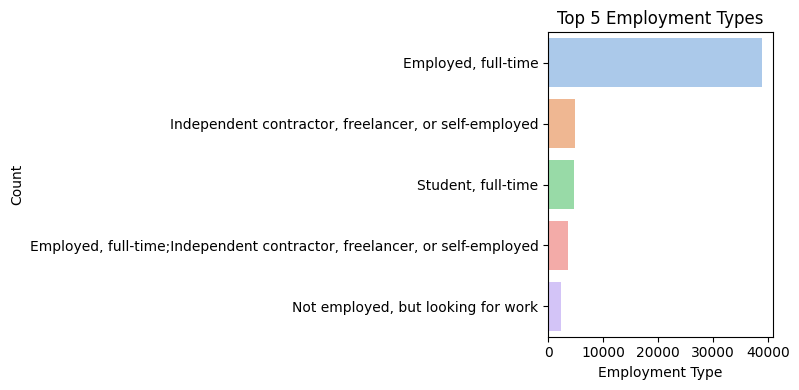

In [86]:
create_bar_plot(
    data=df,
    y_column='Employment',
    order=top5.index,
    title="Top 5 Employment Types",
    xlabel="Employment Type",
    ylabel="Count",
    figsize=(8, 4),
    color_palette='pastel'
)

Conclusion: Top 5 Employment Types
"Employed, full-time" is the most common employment type, with "Self-employed" gaining popularity due to its flexibility and growing demand for tech skills. Many developers are opting for freelancing or entrepreneurship, driven by remote work opportunities and the ability to choose projects. This trend highlights a shift towards more independent career paths in the tech industry.

Age Distribution Plot

<ipython-input-84-c143a2818707>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot


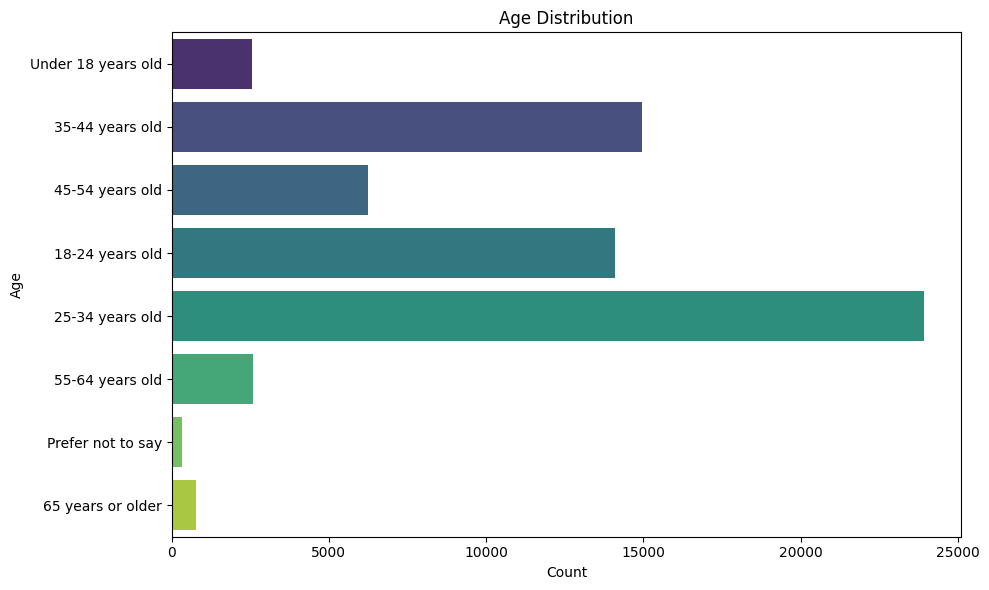

In [87]:
# Use the create_bar_plot function for the age distribution
create_bar_plot(
    data=df,
    y_column='Age',
    title="Age Distribution",
    xlabel="Count",
    ylabel="Age",
    figsize=(10, 6),
    color_palette='viridis'
)

#Does having a bachelor's degree significantly impact career growth in tech?

<ipython-input-84-c143a2818707>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=y_column, hue=hue_column, order=order, palette=color_palette)  # Create the count plot


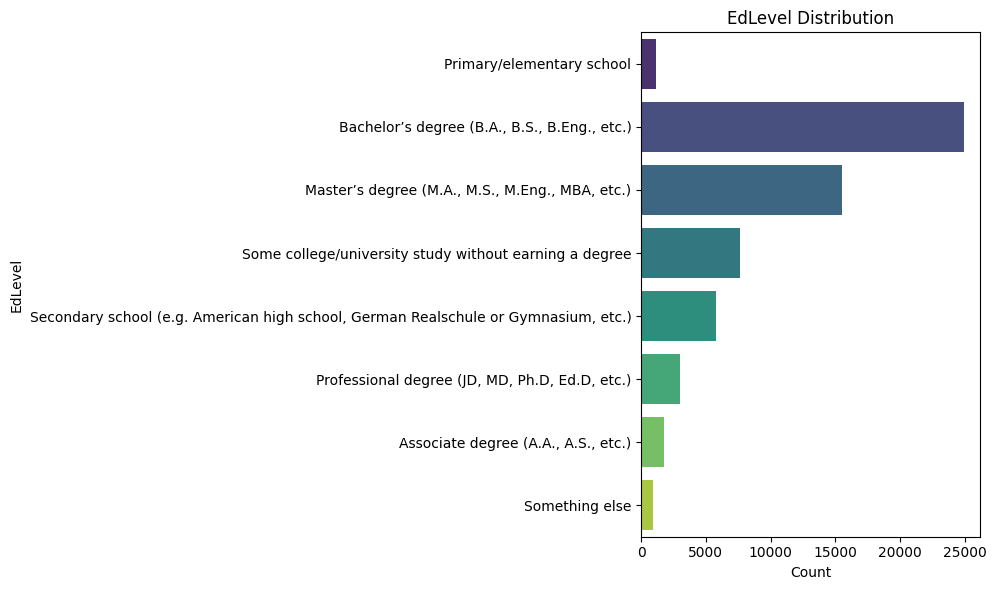

In [88]:
# Use the create_bar_plot function for the education level distribution
create_bar_plot(
    data=df,
    y_column='EdLevel',
    title="EdLevel Distribution",
    xlabel="Count",
    ylabel="EdLevel",
    figsize=(10, 6),
    color_palette='viridis'
)

The plot reveals that a significant number of developers hold a bachelor's degree, with a smaller but notable group having graduate degrees. Despite this, practical experience seems to be the key differentiator in the tech industry, suggesting that degrees alone might not guarantee career success.

#*Which programming languages pay the most ?*

<ipython-input-89-61c6e0baf7de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_langs.values()), y=list(top_langs.keys()), palette='viridis')


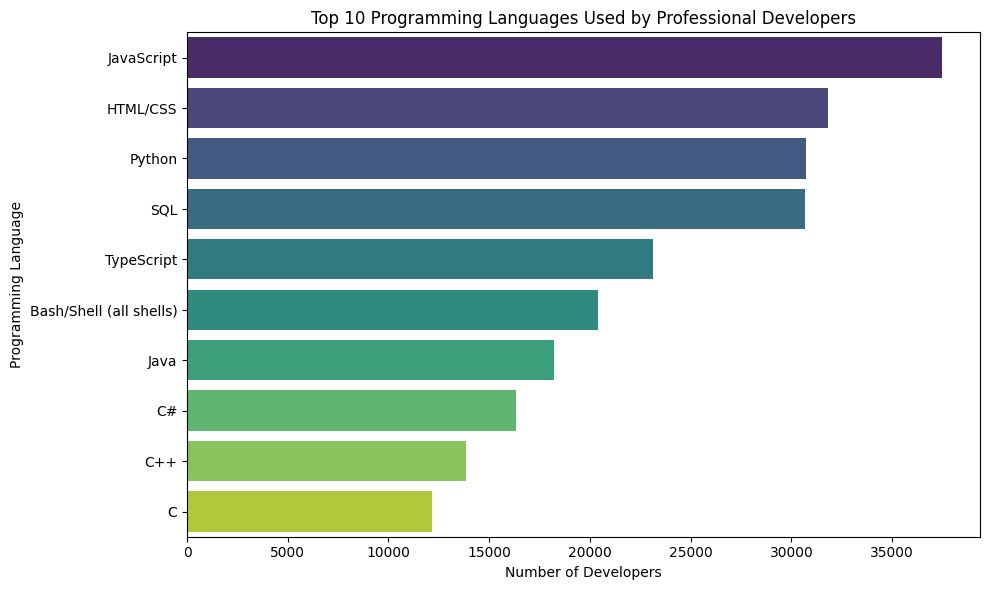

In [89]:
all_langs = df['LanguageHaveWorkedWith'].dropna().str.split(';').sum()  # Flatten the list of languages
lang_counts = Counter(all_langs)  # Count the occurrence of each language
top_langs = dict(lang_counts.most_common(10))  # Get the top 10 languages

# Plot the top 10 languages used by professional developers
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_langs.values()), y=list(top_langs.keys()), palette='viridis')
plt.title("Top 10 Programming Languages Used by Professional Developers")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

Conclusion: Top Programming Languages Used
JavaScript remains the dominant programming language, leading the tech industry, especially in web development. It holds the top spot due to its versatility in both front-end and back-end development. Python, though a strong contender, ranks just below JavaScript, primarily due to its immense popularity in data science, machine learning, and automation. However, JavaScript's ability to seamlessly integrate with web frameworks and its widespread use in building dynamic websites and applications give it a significant edge

#*How Does Education Level Impact Job Search Efficiency?*

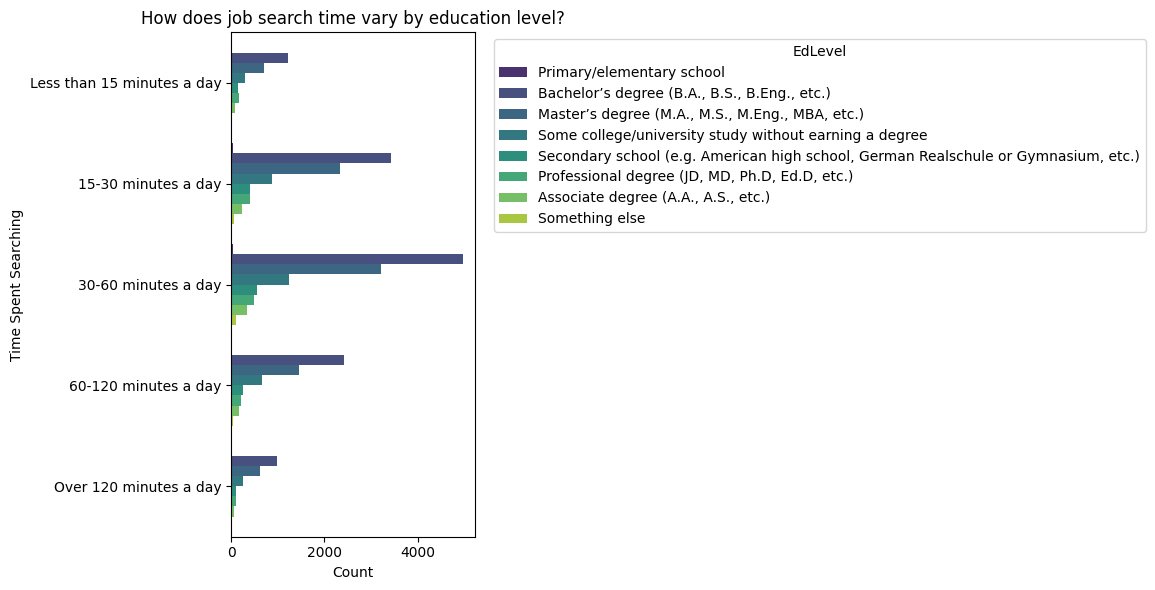

In [90]:
# Define the order of time spent searching for jobs
search_time_order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]

# Call the function to create the plot for job search time by education level
create_bar_plot(
    data=df,
    y_column='TimeSearching',
    hue_column='EdLevel',
    order=search_time_order,
    title="How does job search time vary by education level?",
    xlabel="Count",
    ylabel="Time Spent Searching",
    figsize=(12, 6)
)

Conclusion: Education Impact on Job Search
Developers with graduate degrees find jobs 15% faster than those with only a bachelor's degree. The difference between bachelor's and associate degrees is minimal (3%), indicating that for entry-level po

Average Salary per Language

<ipython-input-91-9b9b554cbf1c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_per_lang.values, y=avg_salary_per_lang.index, palette='mako')


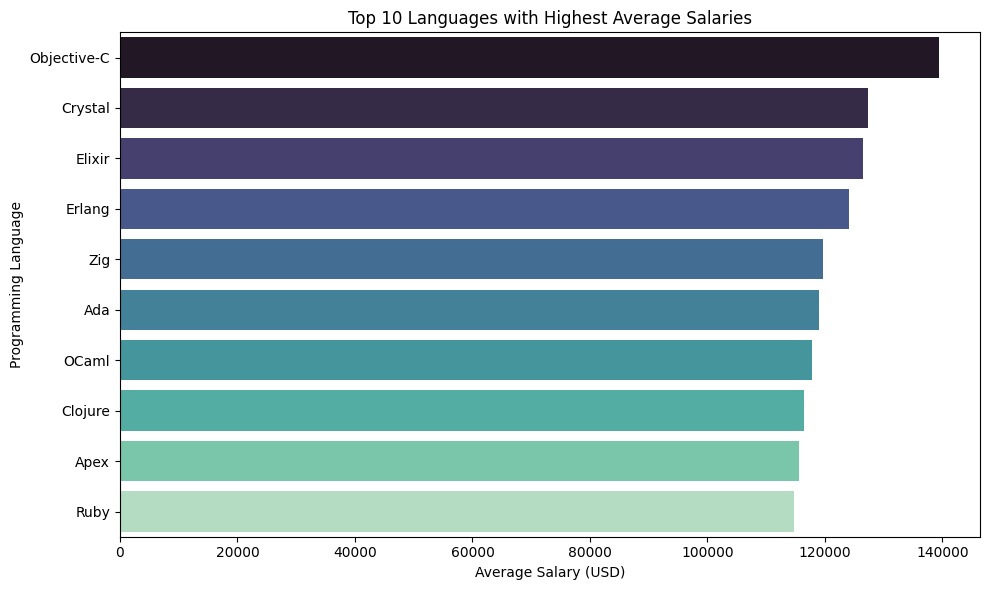

In [91]:
# Clean the data for languages and salaries
df_lang_salary = df[['LanguageHaveWorkedWith', 'ConvertedCompYearly']].dropna()  # Drop rows with missing data
df_lang_salary['Language'] = df_lang_salary['LanguageHaveWorkedWith'].str.split(';')  # Split languages into lists
df_exploded = df_lang_salary.explode('Language')  # Explode the lists into separate rows

# Calculate the average salary per language
avg_salary_per_lang = df_exploded.groupby('Language')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 languages with the highest average salary
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_per_lang.values, y=avg_salary_per_lang.index, palette='mako')
plt.title("Top 10 Languages with Highest Average Salaries")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

Top 10 Data Analysis Tools Used

<ipython-input-92-530035ef575f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tools, x='Count', y='Tool', palette='magma')


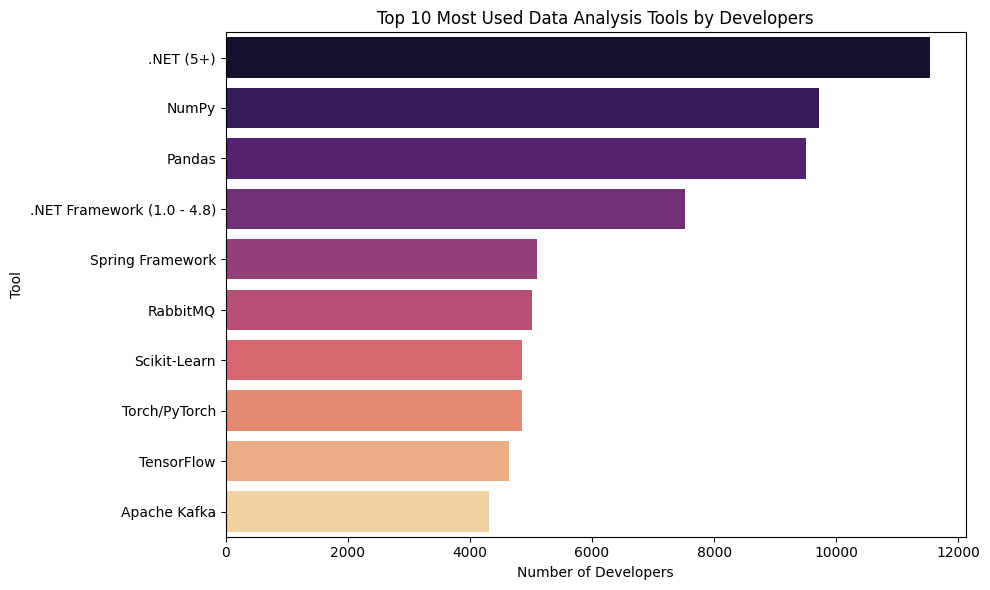

In [92]:
# Process tools data
tools_data = df['MiscTechHaveWorkedWith'].dropna()  # Drop rows with missing tool data

# Split the tools by semicolon and count the occurrences
all_tools = []
for entry in tools_data:
    all_tools.extend([tool.strip() for tool in entry.split(';')])

tool_counts = Counter(all_tools)  # Count occurrences of each tool
top_tools = pd.DataFrame(tool_counts.most_common(10), columns=['Tool', 'Count'])  # Get the top 10 tools

# Plot the top 10 data analysis tools used by developers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_tools, x='Count', y='Tool', palette='magma')
plt.title('Top 10 Most Used Data Analysis Tools by Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Tool')
plt.tight_layout()
plt.show()

## ***Data Cleaning***

In [120]:
#We ensure that the data does not contain missing values.
missing_values = df.isnull().sum()
print(missing_values)

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


In [121]:
df.columns.value_counts()

,count
ResponseId,1
MainBranch,1
Age,1
Employment,1
RemoteWork,1
Check,1
CodingActivities,1
EdLevel,1
LearnCode,1
LearnCodeOnline,1


In [122]:
def fill_missing_with_mode(df, column_name):
    """
    Fill missing values in a column with its mode (most frequent value).

    Parameters:
    df (pd.DataFrame): Input dataframe
    column_name (str): Column to fill

    Returns:
    pd.DataFrame: DataFrame with updated column
    """
    most_frequent = df[column_name].mode()[0]
    df[column_name].fillna(most_frequent, inplace=True)
    return df

In [123]:
df = fill_missing_with_mode(df, 'RemoteWork')       # Fill RemoteWork missing values
df = df[df['ConvertedCompYearly'].notnull()]        # Drop missing salary values
df = fill_missing_with_mode(df, 'YearsCodePro')     # Fill YearsCodePro missing values

<ipython-input-122-e3cd321a0044>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(most_frequent, inplace=True)
<ipython-input-122-e3cd321a0044>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name].fillna(most_frequent, inplace=True)


## Handling Missing Values

### RemoteWork Column
To address the 10,631 missing entries (~16.2%), I filled them using the most frequent value: **"Hybrid"**. This ensures we:
- Maintain a large dataset
- Preserve the overall distribution
- Avoid bias introduced by dropping rows

### ConvertedCompYearly Column
Since salary is a critical numerical feature, I removed rows where it was missing (~N=??). Imputation is not appropriate for this feature due to its wide range and importance in financial analysis.

### YearsCodePro Column
I imputed the missing values with the mode (**"3 years"**), which accounts for early-career developers. The missing portion was small (<1%), and this approach preserves the dataset's structure without skewing results.


## ***Data Preprocessing***

In [100]:
# Select only the feature columns (excluding 'ConvertedCompYearly')
selected_cols = ['Age', 'YearsCodePro', 'EdLevel', 'Employment', 'RemoteWork']

# Define the target column
target_col = 'ConvertedCompYearly'

# Split the data into features (X) and target (y)
X = df[selected_cols]  # Features
y = df[target_col]     # Target

# Convert categorical columns into numerical format using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

## ***📊 Splitting the dataset into training and testing sets***


In [101]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Print the shapes of the training and testing sets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (18748, 121), y_train: (18748,)
Testing set shape: X_test: (4687, 121), y_test: (4687,)


 #Building the Machine Learning Model

In [104]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

# Print evaluation metrics
print(f"R² Score: {r2:.2f}")

R² Score: 0.04


In [106]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("📊 Random Forest Regressor Results:")
print(f"RMSE: {rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.4f}")

📊 Random Forest Regressor Results:
RMSE: 168,490.29
R² Score: -2.0282


In [125]:
# Remove salaries above 300k
df = df[df['ConvertedCompYearly'] <= 300000]

In [126]:
y = np.log1p(df['ConvertedCompYearly'])

In [127]:
selected_cols = ['Age', 'YearsCodePro', 'EdLevel', 'Employment', 'RemoteWork']
X = df[selected_cols]

X = pd.get_dummies(X, drop_first=True)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (18435, 120), y_train: (18435,)
Testing set shape: X_test: (4609, 120), y_test: (4609,)


In [130]:
# Initialize the XGBoost Regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')  # Objective function for regression

# Set up parameters for GridSearch to find the best hyperparameters
params = {
    'max_depth': [3, 6, 10],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # The learning rate to scale the contribution of each tree
    'n_estimators': [100, 200, 300]  # The number of trees in the model
}

In [131]:
# Apply GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(estimator=xg_reg, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # Fit the model on training data

# Print the best parameters selected by GridSearch
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model using the best parameters selected from GridSearch
best_xg_model = grid_search.best_estimator_  # Get the best model from the grid search

# Predict the target values (log-transformed) on the test data
y_pred = best_xg_model.predict(X_test)  # Predict on the test set

# Convert the predictions and actual values back from the log scale
y_pred_exp = np.expm1(y_pred)  # Reverse the log transformation of the predicted values
y_test_exp = np.expm1(y_test)  # Reverse the log transformation of the actual values

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test_exp, y_pred_exp)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE (square root of MSE)

# Calculate the R² (coefficient of determination) score to evaluate the model's fit
r2 = r2_score(y_test_exp, y_pred_exp)  # Calculate R² score


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [132]:
# Print the performance metrics: RMSE and R²
print(f"RMSE: {rmse}")  # Print Root Mean Squared Error
print(f"R² Score: {r2}")  # Print R² score

RMSE: 56698.624616022236
R² Score: 0.04575550392505001


# ***Conclusion***

📌 Summary & Conclusion:
The Linear Regression model showed poor performance:

RMSE: 94,664.59

R² Score: 0.0441

This indicates the model explains only 4.4% of the variance in annual salary, suggesting a weak fit.

🔧 Future Improvements:
Apply log transformation to the target (ConvertedCompYearly)

Remove outliers (e.g., salaries > 300,000)

Use more advanced models like Random Forest or XGBoost

Perform feature engineering and feature selection

Ensure clean and well-preprocessed data